In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("reg_data.csv")
df.head()

,Unnamed: 0,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['Unnamed: 0', 'customerid', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'tenure', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'monthlycharges', 'totalcharges',
       'churn'],
      dtype='object')

In [4]:
df.shape

(7043, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   customerid        7043 non-null   object 
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   int64  
 4   partner           7043 non-null   object 
 5   dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   object 
 8   multiplelines     7043 non-null   object 
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   object 
 11  onlinebackup      7043 non-null   object 
 12  deviceprotection  7043 non-null   object 
 13  techsupport       7043 non-null   object 
 14  streamingtv       7043 non-null   object 
 15  streamingmovies   7043 non-null   object 
 16  contract          7043 non-null   object 


In [6]:
df.isnull().sum()

Unnamed: 0          0
customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [7]:
df1 =df.iloc[:,2:]
df1.head(2)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [8]:
df1.churn.replace({"Yes":1,"No":0},inplace=True)
# performing one hot encoding
dummy_df = pd.get_dummies(df1)
dummy_df.to_csv("final_df.csv")
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   seniorcitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   monthlycharges                           7043 non-null   float64
 3   totalcharges                             7043 non-null   float64
 4   churn                                    7043 non-null   int64  
 5   gender_Female                            7043 non-null   uint8  
 6   gender_Male                              7043 non-null   uint8  
 7   partner_No                               7043 non-null   uint8  
 8   partner_Yes                              7043 non-null   uint8  
 9   dependents_No                            7043 non-null   uint8  
 10  dependents_Yes                           7043 no

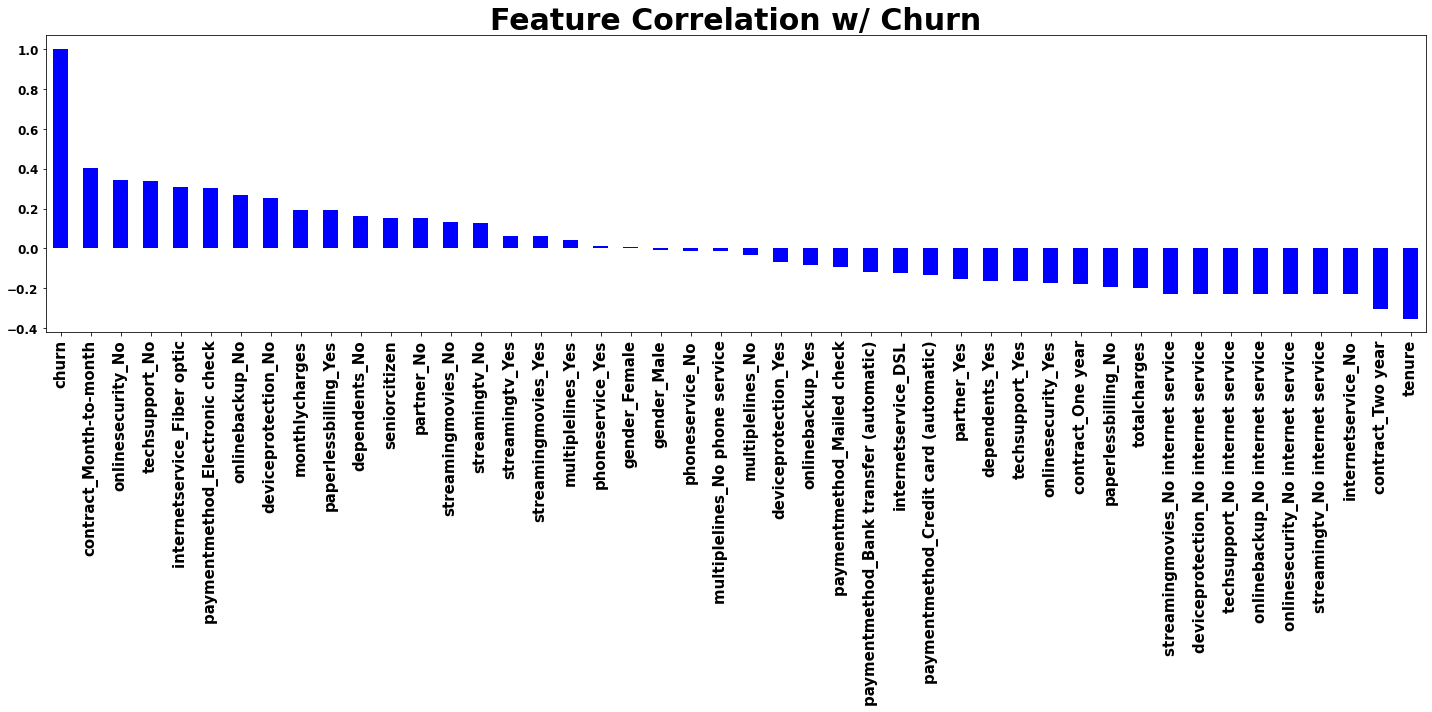

In [9]:
dummy_df.corr()['churn'].sort_values(ascending = False).plot(kind='bar', figsize = (20, 10), color = 'Blue')
plt.title('Feature Correlation w/ Churn', fontsize = 30, fontweight = 'bold')
plt.xticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontweight = 'bold', fontsize = 12)
plt.tight_layout()

- From our correlation barplot, we see that monthly contract, and a lack of online security or techsupport have the strongest positive correlation with churn. 2-Year Contracts and not having internet service are the most negatively correlated with churn.

In [10]:
dummy_df.columns

Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges', 'churn',
       'gender_Female', 'gender_Male', 'partner_No', 'partner_Yes',
       'dependents_No', 'dependents_Yes', 'phoneservice_No',
       'phoneservice_Yes', 'multiplelines_No',
       'multiplelines_No phone service', 'multiplelines_Yes',
       'internetservice_DSL', 'internetservice_Fiber optic',
       'internetservice_No', 'onlinesecurity_No',
       'onlinesecurity_No internet service', 'onlinesecurity_Yes',
       'onlinebackup_No', 'onlinebackup_No internet service',
       'onlinebackup_Yes', 'deviceprotection_No',
       'deviceprotection_No internet service', 'deviceprotection_Yes',
       'techsupport_No', 'techsupport_No internet service', 'techsupport_Yes',
       'streamingtv_No', 'streamingtv_No internet service', 'streamingtv_Yes',
       'streamingmovies_No', 'streamingmovies_No internet service',
       'streamingmovies_Yes', 'contract_Month-to-month', 'contract_One year',
       'contract_Two

## Pre-Processing Data 

In [11]:
y = dummy_df.churn.values
x = dummy_df.drop('churn',axis=1)

In [12]:
cols= x.columns

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
min_max = MinMaxScaler()
x = pd.DataFrame(min_max.fit_transform(x))
x.columns = cols

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=33)

In [16]:
log_reg = LogisticRegression(fit_intercept = False,C = 1e12,solver="liblinear")
log_reg.fit(x_train,y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [17]:
y_hat_train = log_reg.predict(x_train)
y_hat_test = log_reg.predict(x_test)

In [18]:
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print('----------------------------------')
print(pd.Series(residuals).value_counts(normalize = True))

0    4270
1    1012
dtype: int64
----------------------------------
0    0.808406
1    0.191594
dtype: float64


## Train Set Results:
- 4270 Correct (1012 Incorrect)
- 80.8 % Accuracy

In [19]:
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[1153  128]
 [ 224  256]]


In [20]:
def print_metrics(y_train, y_hat_train, y_test, y_hat_test):
    print(f'Training Precision: ',precision_score(y_train, y_hat_train))
    print(f'Testing Precision: ', precision_score(y_test, y_hat_test))
    print('\n')
    print(f'Training Accuracy: ', accuracy_score(y_train, y_hat_train))
    print(f'Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
    print('\n')
    print(f'Training Recall: ', recall_score(y_train, y_hat_train))
    print(f'Testing Recall: ', recall_score(y_test, y_hat_test))
    print('\n')
    print(f'Testing F1-Score: ', f1_score(y_test, y_hat_test))
    print(f'Training F1-Score: ', f1_score(y_train, y_hat_train))

In [21]:
print_metrics(y_train, y_hat_train, y_test, y_hat_test)

Training Precision:  0.6615252784918595
Testing Precision:  0.6666666666666666


Training Accuracy:  0.8084059068534646
Testing Accuracy:  0.8001135718341851


Training Recall:  0.5557955363570914
Testing Recall:  0.5333333333333333


Testing F1-Score:  0.5925925925925926
Training F1-Score:  0.6040688575899844
